# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [56]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [57]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [58]:
#  1. Get the total rides for each city type
total_rides_by_type=pyber_data_df.groupby(["type"])["ride_id"].count()

total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [59]:
# 2. Get the total drivers for each city type
total_drivers_by_type=pyber_data_df.groupby(["type"])["driver_count"].count()

total_drivers_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [60]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby('type')['fare'].sum()

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
#  4. Get the average fare per ride for each city type. 
avg_fare_rider = pyber_data_df.groupby('type')['fare'].sum() / pyber_data_df.groupby('type')['ride_id'].count()
avg_fare_rider

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [62]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = pyber_data_df.groupby('type')['fare'].sum() / city_data_df.groupby('type')['driver_count'].sum()
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [63]:
#  6. Create a PyBer summary DataFrame. 
pyBer_summary = {'Total Rides': total_rides_by_type,'Total Drivers': total_drivers_by_type,'Total Fares': total_fares, 'Average Fare per Ride':avg_fare_rider, 'Average Fare per Driver': avg_fare_driver}
pyBer_summary_df = pd.DataFrame(pyBer_summary)
pyBer_summary_df

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
type,,,,,
Rural,55.486282,34.623440,125,4327.93,125
Suburban,39.502714,30.970128,625,19356.33,625
Urban,16.571468,24.525772,1625,39854.38,1625


In [68]:
#  7. Cleaning up the DataFrame. Delete the index name
pyBer_summary_df.index.name = None

pyBer_summary_df

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
Rural,55.486282,34.623440,125,4327.93,125
Suburban,39.502714,30.970128,625,19356.33,625
Urban,16.571468,24.525772,1625,39854.38,1625


In [67]:
#  8. Format the columns.
format_dic = {'Total Fares':'${0:,.2f}', 'Average Fare per Ride':'${0:,.2f}','Average Fare per Driver':'${0:,.2f}'}
pyBer_summary_df.style.format(format_dic)

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
Rural,$55.49,$34.62,125,"$4,327.93",125
Suburban,$39.50,$30.97,625,"$19,356.33",625
Urban,$16.57,$24.53,1625,"$39,854.38",1625


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [69]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [70]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_pyber_data_df = pyber_data_df.groupby(['type','date'])['fare'].sum()
new_pyber_data_df = pd.DataFrame(new_pyber_data_df)
new_pyber_data_df 

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
      2019-01-08 06:19:45  19.39
      2019-01-09 15:30:35  31.84
      2019-01-11 04:39:27  16.42
      2019-01-14 07:09:17  18.05
      2019-01-14 15:58:48  54.10
      2019-01-15 21:44:26  30.26
      2019-01-18 00:46:28  15.12
      2019-01-18 07:36:46  43.57
      2019-01-19 11:40:46  49.44
      2019-01-19 12:38:07  38.68
      2019-01-19 20:21:54  56.78
      2019-01-22 12:42:55  13.50
      2019-01-22 15:36:24  10.11
      2019-01-23 06:52:00  40.24
      2019-01-24 13:32:12  34.74
      2019-01-27 17:33:41  42.68
      2019-01-27 18:43:05  38.42
      2019-01-28 15:55:33  31.25
      2019-01-30 00:05:47  20.76
      2019-01-30 01:40:16  37.05
      2019-01-30 10:55:23  51.39
      2019-01-31 17:57:25  58.29
      2019-02-01 08:59:24  17.05
      2019-02-02 06:28:04  53.07
      2019-02-02 14:54:00  12.42
...                          ...
Urban 2019-05-05 14:17:49  23.66
      2019-05-05 15:15:23  38.15
      2019-05-05 15:47:32  37.75
      2019-05-05 17:29:14  30.47
      2019-05-05 17:38:07  14.95
      2019-05-06 01:06:46  17.63
      2019-05-06 05:05:46  43.43
      2019-05-06 12:39:09  40.79
      2019-05-06 19:34:45  26.43
      2019-05-06 22:21:58  27.16
      2019-05-06 23:22:49  25.76
      2019-05-07 01:03:12  12.35
      2019-05-07 02:52:22  36.51
      2019-05-07 05:55:00   6.89
      2019-05-07 08:47:24  25.83
      2019-05-07 10:11:06  29.66
      2019-05-07 11:23:59  22.72
      2019-05-07 12:25:01   4.47
      2019-05-07 12:30:58  34.03
      2019-05-07 14:58:12  36.22
      2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [72]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_pyber_data_df  = new_pyber_data_df.reset_index()

new_pyber_data_df

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33
5,5,Rural,2019-01-08 06:19:45,19.39
6,6,Rural,2019-01-09 15:30:35,31.84
7,7,Rural,2019-01-11 04:39:27,16.42
8,8,Rural,2019-01-14 07:09:17,18.05
9,9,Rural,2019-01-14 15:58:48,54.10


In [74]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_pyber_data_df = new_pyber_data_df.pivot(index='date',columns='type',values='fare')

In [75]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_data_JantoApril_df = pivot_pyber_data_df.loc['2019-01-01':'2019-04-29']
pyber_data_JantoApril_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [76]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_data_JantoApril_df.index = pd.to_datetime(pyber_data_JantoApril_df.index)

In [77]:
# 7. Check that the datatype for the index is datetime using df.info()

pyber_data_JantoApril_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6 KB


In [98]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = pyber_data_JantoApril_df.resample('W').sum()
weekly_fares_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


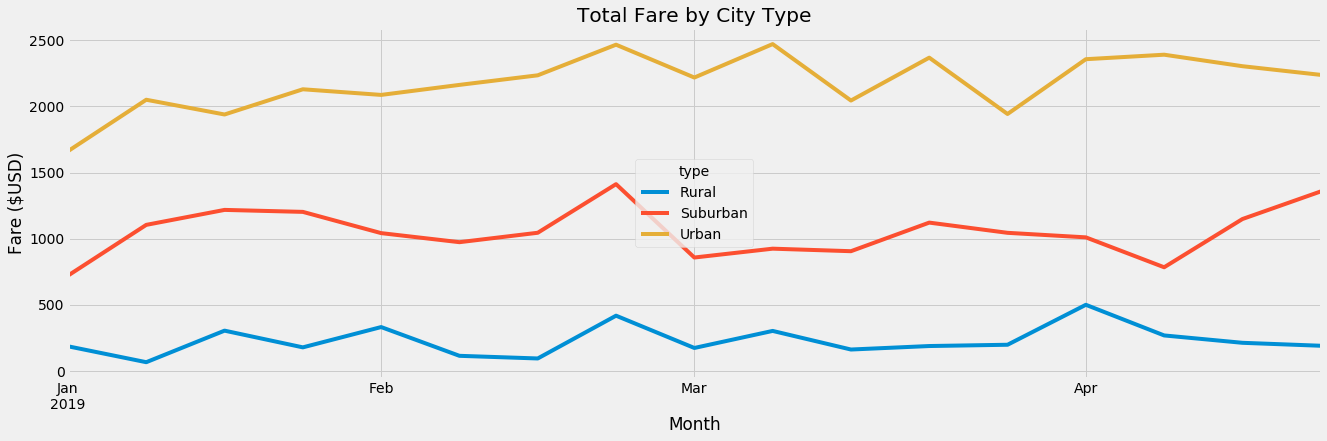

In [99]:
# 8. Using the object-oriented interface method, plot the resample DataFrame 
#using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()